In [3]:
# Checking if the page is retrievable
url='https://www.premierleague.com/en/tables?competition=8&season=2025&round=L_1&matchweek=1&ha=-1'
#'https://en.wikipedia.org/wiki/Premier_League'
requests.get(url)

<Response [200]>

In [4]:
# Parasing HTML
soup=BeautifulSoup(requests.get(url).text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="matches" data-analytics="screen_page_category">
   <meta content="Premier League Table, Form Guide &amp; Season Archives" name="twitter:title">
    <meta content="View the latest Premier League tables, form guides and season archives, on the official website of the Premier League." name="description">
     <meta content="View the latest Premier League tables, form guides and season archives, on the official website of the Premier League." name="twitter:description"/>
     <meta content="standings" data-analytics="screen_page_name"/>
     <meta content="Premier League Table, Form Guide &amp; Season Archives" property="og:title"/>
     <title>
      Premier League Table, Form Guide &amp; Season Archives
     </title>
     <meta content="View the latest Premier League ta

In [5]:
table=soup.find_all('table')
print(f'Found {len(table)} table(s).')

Found 0 table(s).


In [6]:
standings=soup.find_all('table')[9]
standings

IndexError: list index out of range

In [ ]:
col=standings.find_all('th')
col

In [ ]:
col_=[title.text.strip() for title in col]
col_

In [ ]:
df=pd.DataFrame(columns=col_)
df

In [ ]:
# Finding rows with the required data
rows_=standings.find_all('tr')
rows_

In [ ]:
print(f"Expected columns: {len(df.columns)}")
print(f"Row data length: {len(rows_)}")

In [ ]:
# What we are adding
print(rows_)

In [ ]:
for x in rows_[1:]:
    row_data=x.find_all('td')
    ind_data=[y.text.strip() for y in row_data]
    length=len(df)
    df.loc[length] = ind_data

In [ ]:
df

In [ ]:
pwd

In [573]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [571]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.football-data.co.uk/blog/index.php'
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')

# List of article links
links = soup.select('a[href*=".php"]')
for a in links:
    title = a.get_text(strip=True)
    href = a['href']
    print(title, href)


 https://www.football-data.co.uk/disclaimer.php
Betting Books https://www.football-data.co.uk/books.php
Contact https://www.football-data.co.uk/contact.php
£30 Welcome Free Bet https://freebets.football-data.co.uk/bet365.php
2 Goals Early Payout https://www.football-data.co.uk/bet365_2_goals.php
In-Play & Streaming https://www.football-data.co.uk/bet365_streaming.php
Soccer Acca Boost https://www.football-data.co.uk/bet365_acca_boost.php
6 Score Challenge https://www.football-data.co.uk/bet365_6score.php
£50 Free Bets https://freebets.football-data.co.uk/50freebets.php
£40 Free Bets https://freebets.football-data.co.uk/40freebets.php
£30 Free Bets https://freebets.football-data.co.uk/30freebets.php
€40 Free Bets https://freebets.football-data.co.uk/40freebets.php
tipstrr https://www.football-data.co.uk/blog/tipstrr.php
Betshares in Overs/Unders https://www.football-data.co.uk/blog/betshare.php
Analysing Tipsters https://www.football-data.co.uk/blog/closing_odds.php
Asian Handicap https

# Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

### Key to results data:

Div = League Division <br>
Date = Match Date (dd/mm/yy) \
Time = Time of match kick off \
HomeTeam = Home Team \
AwayTeam = Away Team \
FTHG and HG = Full Time Home Team Goals \
FTAG and AG = Full Time Away Team Goals \
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win) \
HTHG = Half Time Home Team Goals \
HTAG = Half Time Away Team Goals \
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win) 

### Match Statistics (where available)
Attendance = Crowd Attendance \
Referee = Match Referee \
HS = Home Team Shots \
AS = Away Team Shots \
HST = Home Team Shots on Target \
AST = Away Team Shots on Target \
HHW = Home Team Hit Woodwork \
AHW = Away Team Hit Woodwork \
HC = Home Team Corners \
AC = Away Team Corners \
HF = Home Team Fouls Committed \
AF = Away Team Fouls Committed \
HFKC = Home Team Free Kicks Conceded \
AFKC = Away Team Free Kicks Conceded \
HO = Home Team Offsides \
AO = Away Team Offsides \
HY = Home Team Yellow Cards \
AY = Away Team Yellow Cards \
HR = Home Team Red Cards \
AR = Away Team Red Cards \
HBP = Home Team Bookings Points (10 = yellow, 25 = red) \
ABP = Away Team Bookings Points (10 = yellow, 25 = red) 

Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.


The following key to betting odds data is described below. These are for pre-closing odds. For the closing odds, as below but with an additional "C" character following the bookmaker abbreviation/Max/Avg (e.g. B365CH = closing Bet365 home win odds).

1XBH = 1XBet home win odds \
1XBD = 1XBet draw odds \
1XBA = 1XBet away win odds \
B365H = Bet365 home win odds \
B365D = Bet365 draw odds \
B365A = Bet365 away win odds \
BFH = Betfair home win odds \
BFD = Betfair draw odds \
BFA = Betfair away win odds \
BFDH = Betfred home win odds \
BFDD = Betfred draw odds \
BFDA = Betfred away win odds \
BMGMH = BetMGM home win odds \
BMGMD = BetMGM draw odds \
BMGMA = BetMGM away win odds \
BVH = Betvictor home win odds \
BVD = Betvictor draw odds \
BVA = Betvictor away win odds \
BSH = Blue Square home win odds \
BSD = Blue Square draw odds \
BSA = Blue Square away win odds \
BWH = Bet&Win home win odds \
BWD = Bet&Win draw odds \
BWA = Bet&Win away win odds \
CLH = Coral home win odds \
CLD = Coral draw odds \
CLA = Coral away win odds \
GBH = Gamebookers home win odds \
GBD = Gamebookers draw odds \
GBA = Gamebookers away win odds \
IWH = Interwetten home win odds \
IWD = Interwetten draw odds \
IWA = Interwetten away win odds \
LBH = Ladbrokes home win odds \
LBD = Ladbrokes draw odds \
LBA = Ladbrokes away win odds \
PSH and PH = Pinnacle home win odds \
PSD and PD = Pinnacle draw odds \
PSA and PA = Pinnacle away win odds \
SOH = Sporting Odds home win odds \
SOD = Sporting Odds draw odds \
SOA = Sporting Odds away win odds \
SBH = Sportingbet home win odds \
SBD = Sportingbet draw odds \
SBA = Sportingbet away win odds\
SJH = Stan James home win odds \
SJD = Stan James draw odds \
SJA = Stan James away win odds \
SYH = Stanleybet home win odds \
SYD = Stanleybet draw odds \
SYA = Stanleybet away win odds \
VCH = VC Bet home win odds (now BetVictor, see above) \
VCD = VC Bet draw odds (now BetVictor, see above)\
VCA = VC Bet away win odds (now BetVictor, see above) \
WHH = William Hill home win odds \
WHD = William Hill draw odds \
WHA = William Hill away win odds 

Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums \
BbMxH = Betbrain maximum home win odds \
BbAvH = Betbrain average home win odds \
BbMxD = Betbrain maximum draw odds \
BbAvD = Betbrain average draw win odds \
BbMxA = Betbrain maximum away win odds \
BbAvA = Betbrain average away win odds 

MaxH = Market maximum home win odds \
MaxD = Market maximum draw win odds \
MaxA = Market maximum away win odds \
AvgH = Market average home win odds \
AvgD = Market average draw win odds \
AvgA = Market average away win odds 

BFEH = Betfair Exchange home win odds \
BFED = Betfair Exchange draw odds \
BFEA = Betfair Exchange away win odds



### Key to total goals betting odds:

BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums \
BbMx>2.5 = Betbrain maximum over 2.5 goals \
BbAv>2.5 = Betbrain average over 2.5 goals \
BbMx<2.5 = Betbrain maximum under 2.5 goals \
BbAv<2.5 = Betbrain average under 2.5 goals 

GB>2.5 = Gamebookers over 2.5 goals \
GB<2.5 = Gamebookers under 2.5 goals \
B365>2.5 = Bet365 over 2.5 goals \
B365<2.5 = Bet365 under 2.5 goals \
P>2.5 = Pinnacle over 2.5 goals \
P<2.5 = Pinnacle under 2.5 goals \
Max>2.5 = Market maximum over 2.5 goals \
Max<2.5 = Market maximum under 2.5 goals \
Avg>2.5 = Market average over 2.5 goals \
Avg<2.5 = Market average under 2.5 goals


### Key to Asian handicap betting odds:

BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums \
BbAHh = Betbrain size of handicap (home team) \
AHh = Market size of handicap (home team) (since 2019/2020) \
BbMxAHH = Betbrain maximum Asian handicap home team odds \
BbAvAHH = Betbrain average Asian handicap home team odds \
BbMxAHA = Betbrain maximum Asian handicap away team odds \
BbAvAHA = Betbrain average Asian handicap away team odds

GBAHH = Gamebookers Asian handicap home team odds \
GBAHA = Gamebookers Asian handicap away team odds \
GBAH = Gamebookers size of handicap (home team) \
LBAHH = Ladbrokes Asian handicap home team odds \
LBAHA = Ladbrokes Asian handicap away team odds \
LBAH = Ladbrokes size of handicap (home team) \
B365AHH = Bet365 Asian handicap home team odds \
B365AHA = Bet365 Asian handicap away team odds \
B365AH = Bet365 size of handicap (home team) \
PAHH = Pinnacle Asian handicap home team odds \
PAHA = Pinnacle Asian handicap away team odds \
MaxAHH = Market maximum Asian handicap home team odds \
MaxAHA = Market maximum Asian handicap away team odds \
AvgAHH = Market average Asian handicap home team odds  
AvgAHA = Market average Asian handicap away team odds



Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.


Current results (full time, half time)
XScores - http://www.xscores .com

Match statistics
BBC, Flashscore, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr

Bookmakers betting odds
Betbrain.com
Oddsportal.com
Individual bookmakers

Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games.

Additional match statistics (corners, shots, bookings, referee etc.) for the 2000/01 and 2001/02 seasons for the English, Scottish and German leagues were provided by Sports.com (now under new ownership and no longer available).


### Importing the data

In [578]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [568]:
EPL=pd.read_csv('https://raw.githubusercontent.com/Nyakiamo-Samuel/EPL-2024-2025-Analysis/refs/heads/main/EPL_24_25.csv')
EPL

Div        Date   Time       HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    E0  16/08/2024  20:00     Man United       Fulham     1     0   H     0   
1    E0  17/08/2024  12:30        Ipswich    Liverpool     0     2   A     0   
2    E0  17/08/2024  15:00        Arsenal       Wolves     2     0   H     1   
3    E0  17/08/2024  15:00        Everton     Brighton     0     3   A     0   
4    E0  17/08/2024  15:00      Newcastle  Southampton     1     0   H     1   
..   ..         ...    ...            ...          ...   ...   ...  ..   ...   
375  E0  25/05/2025  16:00      Newcastle      Everton     0     1   A     0   
376  E0  25/05/2025  16:00  Nott'm Forest      Chelsea     0     1   A     0   
377  E0  25/05/2025  16:00    Southampton      Arsenal     1     2   A     0   
378  E0  25/05/2025  16:00      Tottenham     Brighton     1     4   A     1   
379  E0  25/05/2025  16:00         Wolves    Brentford     1     1   D     0   

     HTAG  ... B365CAHH B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
0       0  ...     1.86     2.07   1.83   2.11     1.88     2.11     1.82   
1       0  ...     2.05     1.88   2.04   1.90     2.20     2.00     1.99   
2       0  ...     2.02     1.91   2.00   1.90     2.05     1.93     1.99   
3       1  ...     1.87     2.06   1.86   2.07     1.92     2.10     1.83   
4       0  ...     1.87     2.06   1.88   2.06     1.89     2.10     1.82   
..    ...  ...      ...      ...    ...    ...      ...      ...      ...   
375     0  ...     2.00     1.85   2.01   1.90     2.01     1.95     1.95   
376     0  ...     1.80     2.05   1.86   2.08     1.86     2.08     1.81   
377     1  ...     2.03     1.83   2.04   1.87     2.07     1.87     2.03   
378     0  ...     1.95     1.90   2.00   1.93     2.01     1.93     1.95   
379     1  ...     1.85     2.00   1.90   2.03     1.90     2.05     1.85   

     AvgCAHA  BFECAHH  BFECAHA  
0       2.05     1.90     2.08  
1       1.88     2.04     1.93  
2       1.87     2.02     1.96  
3       2.04     1.88     2.11  
4       2.05     1.89     2.10  
..       ...      ...      ...  
375     1.91     1.93     2.05  
376     2.05     1.86     2.14  
377     1.83     2.06     1.89  
378     1.89     2.06     1.93  
379     1.97     1.89     2.10  

[380 rows x 120 columns]

In [48]:
EPL.shape

(380, 120)

In [50]:
EPL.columns.tolist()

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'BFH',
 'BFD',
 'BFA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 '1XBH',
 '1XBD',
 '1XBA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'BFEH',
 'BFED',
 'BFEA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'BFE>2.5',
 'BFE<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'BFEAHH',
 'BFEAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'BFCH',
 'BFCD',
 'BFCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 '1XBCH',
 '1XBCD',
 '1XBCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'BFECH',
 'BFECD',
 'BFECA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC

In [52]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 120 entries, Div to BFECAHA
dtypes: float64(96), int64(16), object(8)
memory usage: 356.4+ KB


### Processing and cleaning the data

In [418]:
epl=EPL[['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 
         'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
epl

Div        Date   Time       HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    E0  16/08/2024  20:00     Man United       Fulham     1     0   H     0   
1    E0  17/08/2024  12:30        Ipswich    Liverpool     0     2   A     0   
2    E0  17/08/2024  15:00        Arsenal       Wolves     2     0   H     1   
3    E0  17/08/2024  15:00        Everton     Brighton     0     3   A     0   
4    E0  17/08/2024  15:00      Newcastle  Southampton     1     0   H     1   
..   ..         ...    ...            ...          ...   ...   ...  ..   ...   
375  E0  25/05/2025  16:00      Newcastle      Everton     0     1   A     0   
376  E0  25/05/2025  16:00  Nott'm Forest      Chelsea     0     1   A     0   
377  E0  25/05/2025  16:00    Southampton      Arsenal     1     2   A     0   
378  E0  25/05/2025  16:00      Tottenham     Brighton     1     4   A     1   
379  E0  25/05/2025  16:00         Wolves    Brentford     1     1   D     0   

     HTAG  ... HST AST  HF  AF  HC  AC  HY  AY  HR  AR  
0       0  ...   5   2  12  10   7   8   2   3   0   0  
1       0  ...   2   5   9  18   2  10   3   1   0   0  
2       0  ...   6   3  17  14   8   2   2   2   0   0  
3       1  ...   1   5   8   8   1   5   1   1   1   0  
4       0  ...   1   4  15  16   3  12   2   4   1   0  
..    ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
375     0  ...   6   6  12   9  12   3   1   4   0   0  
376     0  ...   2   2  10  11   7   4   2   2   0   0  
377     1  ...   2   8   7   8   5   8   0   0   0   0  
378     0  ...   2   8  13   8   2  11   3   1   0   0  
379     1  ...   6   7   7   9   8   3   2   1   0   0  

[380 rows x 24 columns]

In [57]:
epl.shape

(380, 24)

In [58]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   Time      380 non-null    object
 3   HomeTeam  380 non-null    object
 4   AwayTeam  380 non-null    object
 5   FTHG      380 non-null    int64 
 6   FTAG      380 non-null    int64 
 7   FTR       380 non-null    object
 8   HTHG      380 non-null    int64 
 9   HTAG      380 non-null    int64 
 10  HTR       380 non-null    object
 11  Referee   380 non-null    object
 12  HS        380 non-null    int64 
 13  AS        380 non-null    int64 
 14  HST       380 non-null    int64 
 15  AST       380 non-null    int64 
 16  HF        380 non-null    int64 
 17  AF        380 non-null    int64 
 18  HC        380 non-null    int64 
 19  AC        380 non-null    int64 
 20  HY        380 non-null    int64 
 21  AY        380 no

In [59]:
epl.isnull().any()

Div         False
Date        False
Time        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HF          False
AF          False
HC          False
AC          False
HY          False
AY          False
HR          False
AR          False
dtype: bool

In [60]:
epl.duplicated().any()

False

In [61]:
epl.describe()

FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.513158    1.421053    0.752632    0.610526   13.752632   12.165789   
std      1.277917    1.189922    0.875867    0.828831    5.588045    5.409987   
min      0.000000    0.000000    0.000000    0.000000    2.000000    1.000000   
25%      1.000000    1.000000    0.000000    0.000000   10.000000    9.000000   
50%      1.000000    1.000000    1.000000    0.000000   13.000000   11.500000   
75%      2.000000    2.000000    1.000000    1.000000   17.000000   15.000000   
max      7.000000    6.000000    4.000000    5.000000   36.000000   37.000000   

              HST         AST          HF          AF          HC          AC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     4.834211    4.265789   10.789474   11.276316    5.426316    4.871053   
std      2.488260    2.341636    3.639840    3.513257    3.183457    3.031358   
min      0.000000    0.000000    2.000000    1.000000    0.000000    0.000000   
25%      3.000000    3.000000    8.000000    9.000000    3.000000    3.000000   
50%      5.000000    4.000000   11.000000   11.000000    5.000000    4.000000   
75%      6.000000    6.000000   13.000000   14.000000    7.000000    7.000000   
max     16.000000   13.000000   21.000000   21.000000   17.000000   18.000000   

               HY          AY          HR          AR  
count  380.000000  380.000000  380.000000  380.000000  
mean     1.905263    2.144737    0.068421    0.068421  
std      1.395989    1.430021    0.263030    0.252800  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    1.000000    0.000000    0.000000  
50%      2.000000    2.000000    0.000000    0.000000  
75%      3.000000    3.000000    0.000000    0.000000  
max      7.000000    8.000000    2.000000    1.000000

In [153]:
# Changing date datatype from object to datetime
epl.loc[:, 'Date']=pd.to_datetime(epl['Date'])
epl['Date'].dtypes

dtype('O')

In [ ]:
# Changing Time datatype from object to datetime-time
#epl.loc['Time']=pd.to_datetime(epl['Time'], format='%H:%M:%S').dt.time
#epl['Time'].dtypes

In [ ]:
epl.head()

In [ ]:
performance=epl.groupby(['HomeTeam', 'FTR'])[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 
                                                           'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']].sum()
performance

In [ ]:
plt.figure(figsize=(20,20))
epl.groupby(['FTR'])[['HS', 'AS', 'HST', 'AST', 'HTHG', 'HTAG', 'FTHG', 'FTAG']].sum().plot(legend=True, kind='barh')
# ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.title('Sum of shots and goals from both home and away teams')
plt.show()

In [ ]:
#plt.figure(figsize=(40, 40))
sb.catplot(data=epl, kind='count', hue='HomeTeam', col='FTR', x='FTHG', palette='Set2')
# kind = 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar', or 'count'.
plt.xticks(rotation=90)
plt.show()
plt.savefig('A graph.jpg', dpi=500)

### Statistical insights of the data

In [147]:
epl.sample(5)

Div        Date   Time        HomeTeam       AwayTeam  FTHG  FTAG FTR  \
45   E0  21/09/2024  15:00     Southampton        Ipswich     1     1   D   
349  E0  05/05/2025  20:00  Crystal Palace  Nott'm Forest     1     1   D   
23   E0  31/08/2024  15:00         Ipswich         Fulham     1     1   D   
144  E0  08/12/2024  14:00          Fulham        Arsenal     1     1   D   
210  E0  18/01/2025  15:00       Brentford      Liverpool     0     2   A   

     HTHG  HTAG  ... HST AST  HF  AF  HC  AC  HY  AY  HR  AR  
45      1     0  ...   3   6  16  16   2  10   4   4   0   0  
349     0     0  ...   3   4   9  15   7   4   3   8   0   0  
23      1     1  ...   4   4  15  15   8   6   2   3   0   0  
144     1     0  ...   2   4  10   9   0   6   4   2   0   0  
210     0     0  ...   6   8   6  14   2  15   2   3   0   0  

[5 rows x 24 columns]

In [149]:
epl.corr(numeric_only=True)

FTHG      FTAG      HTHG      HTAG        HS        AS       HST  \
FTHG  1.000000 -0.142466  0.703042 -0.039989  0.300480 -0.167287  0.567012   
FTAG -0.142466  1.000000 -0.028914  0.693754 -0.152939  0.335058 -0.141222   
HTHG  0.703042 -0.028914  1.000000 -0.038565  0.072102 -0.067052  0.366127   
HTAG -0.039989  0.693754 -0.038565  1.000000 -0.023705  0.105057 -0.027554   
HS    0.300480 -0.152939  0.072102 -0.023705  1.000000 -0.404657  0.693273   
AS   -0.167287  0.335058 -0.067052  0.105057 -0.404657  1.000000 -0.247860   
HST   0.567012 -0.141222  0.366127 -0.027554  0.693273 -0.247860  1.000000   
AST  -0.197358  0.587552 -0.122236  0.352566 -0.306903  0.693205 -0.233781   
HF   -0.095268 -0.081825 -0.026310 -0.072730 -0.032793 -0.058922 -0.055720   
AF    0.023577 -0.091650  0.036848 -0.037246 -0.055375 -0.111113 -0.050282   
HC    0.071906 -0.098358 -0.042513  0.013095  0.543162 -0.371494  0.335711   
AC   -0.091171  0.041425 -0.007077 -0.055747 -0.385064  0.549940 -0.200482   
HY   -0.070293  0.025665 -0.032165  0.006793 -0.088924  0.137640 -0.041754   
AY    0.035773 -0.121192  0.026554 -0.114822  0.123029 -0.094512  0.085363   
HR   -0.104731  0.084745 -0.052322  0.062043 -0.142836  0.118094 -0.151943   
AR    0.087047 -0.078480  0.005143 -0.036187  0.129682 -0.164585  0.068416   

           AST        HF        AF        HC        AC        HY        AY  \
FTHG -0.197358 -0.095268  0.023577  0.071906 -0.091171 -0.070293  0.035773   
FTAG  0.587552 -0.081825 -0.091650 -0.098358  0.041425  0.025665 -0.121192   
HTHG -0.122236 -0.026310  0.036848 -0.042513 -0.007077 -0.032165  0.026554   
HTAG  0.352566 -0.072730 -0.037246  0.013095 -0.055747  0.006793 -0.114822   
HS   -0.306903 -0.032793 -0.055375  0.543162 -0.385064 -0.088924  0.123029   
AS    0.693205 -0.058922 -0.111113 -0.371494  0.549940  0.137640 -0.094512   
HST  -0.233781 -0.055720 -0.050282  0.335711 -0.200482 -0.041754  0.085363   
AST   1.000000 -0.034900 -0.147183 -0.249202  0.330087  0.094896 -0.110012   
HF   -0.034900  1.000000  0.085856 -0.057359 -0.015619  0.295685  0.095087   
AF   -0.147183  0.085856  1.000000 -0.021176 -0.026128  0.017725  0.357019   
HC   -0.249202 -0.057359 -0.021176  1.000000 -0.377071 -0.001575  0.129568   
AC    0.330087 -0.015619 -0.026128 -0.377071  1.000000  0.111831 -0.009074   
HY    0.094896  0.295685  0.017725 -0.001575  0.111831  1.000000  0.239508   
AY   -0.110012  0.095087  0.357019  0.129568 -0.009074  0.239508  1.000000   
HR    0.116048  0.048157  0.008040 -0.116854  0.057423 -0.003858 -0.005353   
AR   -0.088746 -0.044522  0.017278  0.104638 -0.046989 -0.026443 -0.034765   

            HR        AR  
FTHG -0.104731  0.087047  
FTAG  0.084745 -0.078480  
HTHG -0.052322  0.005143  
HTAG  0.062043 -0.036187  
HS   -0.142836  0.129682  
AS    0.118094 -0.164585  
HST  -0.151943  0.068416  
AST   0.116048 -0.088746  
HF    0.048157 -0.044522  
AF    0.008040  0.017278  
HC   -0.116854  0.104638  
AC    0.057423 -0.046989  
HY   -0.003858 -0.026443  
AY   -0.005353 -0.034765  
HR    1.000000  0.167494  
AR    0.167494  1.000000

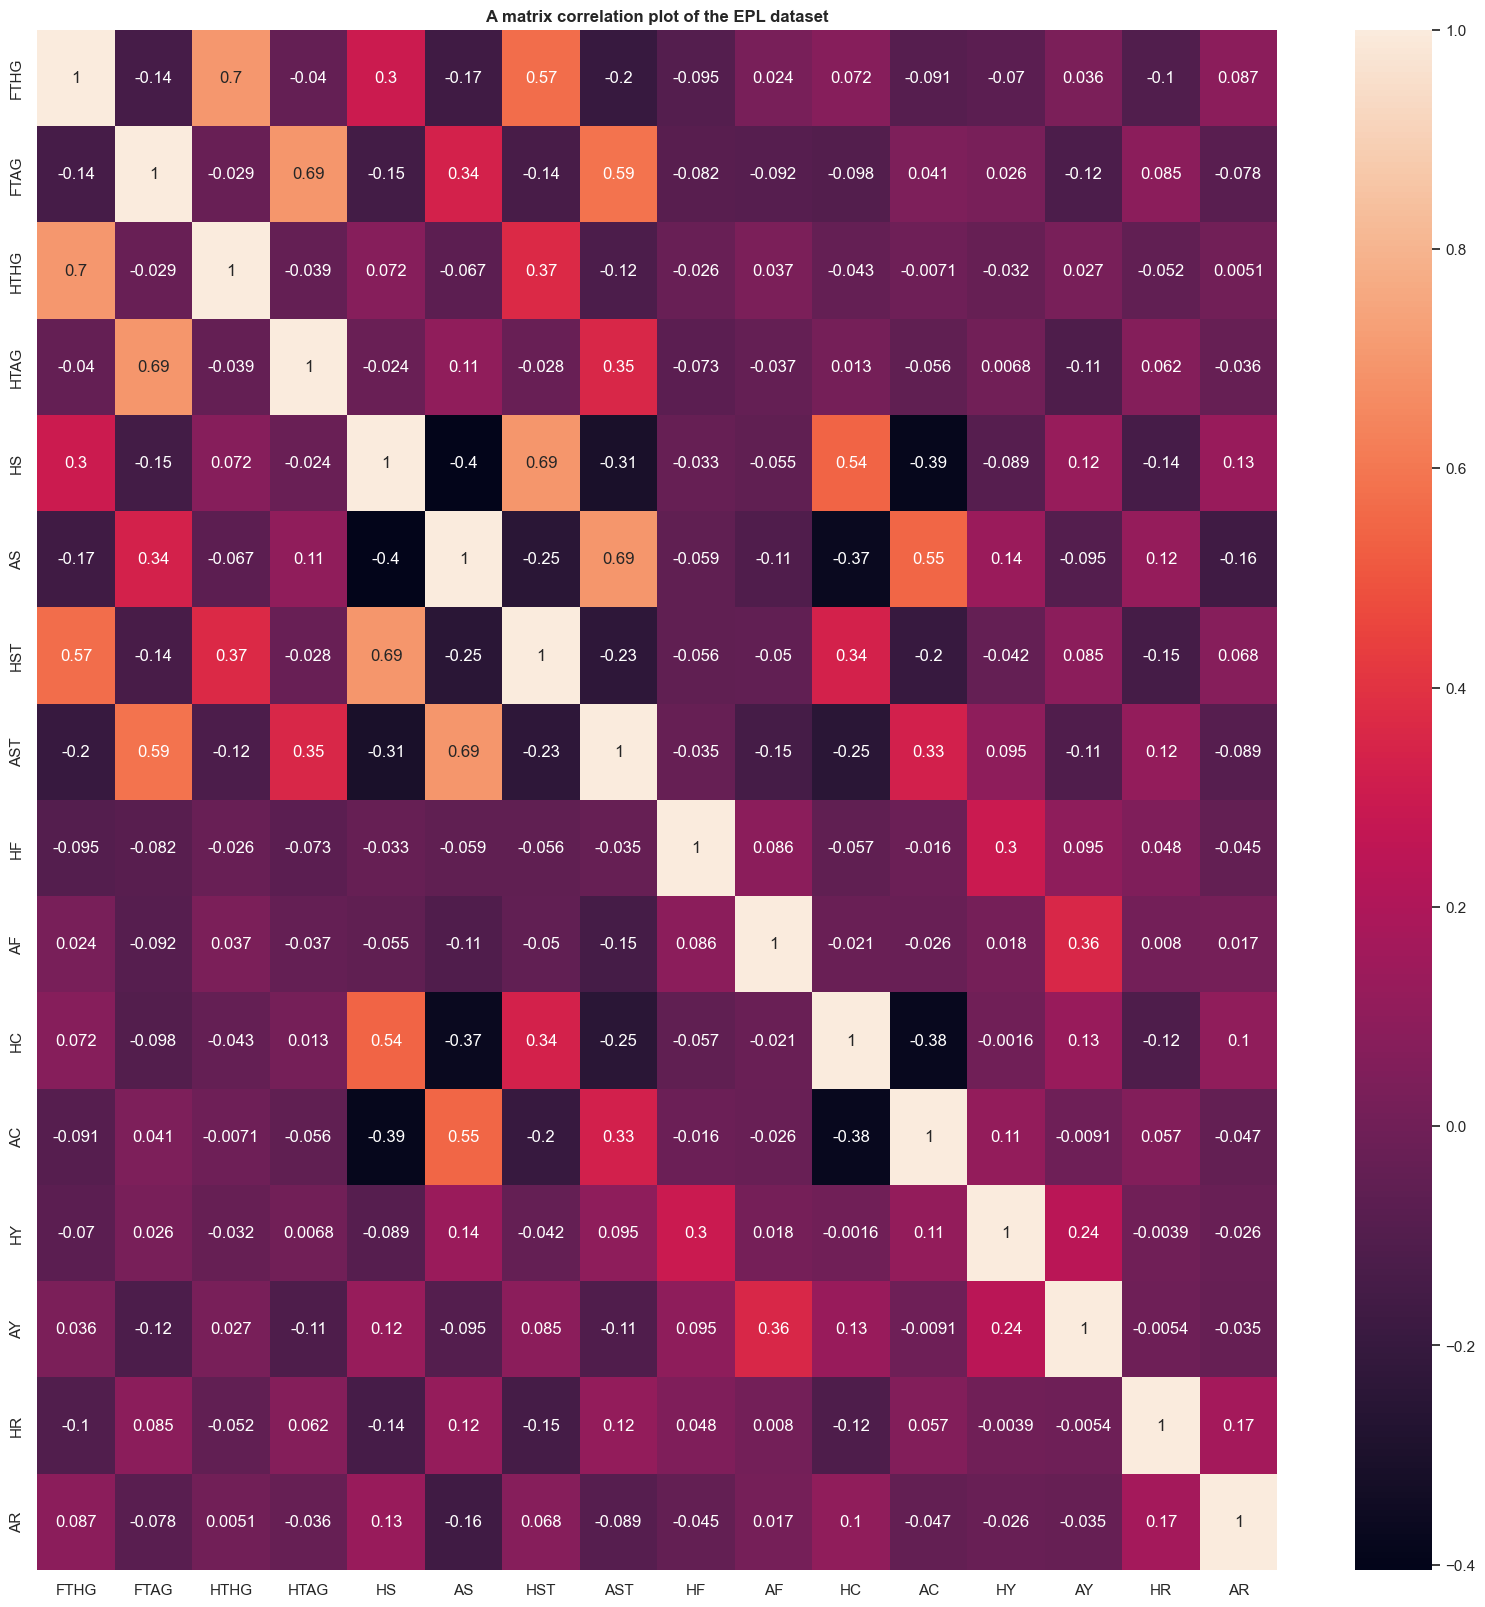

In [632]:
plt.figure(figsize=(20,20))
sb.heatmap(epl.corr(numeric_only=True), annot=True)
plt.title('A matrix correlation plot of the EPL dataset', fontweight='bold')
plt.savefig('EPL correlation matrix', dpi=700)
plt.show()

From the graph above, the variablees with a strong psoitive correlation have a lighter colour whereas the darker colours indicate a strong negarive correlation i.e when one column has its value increasing, the other has its value decreasing and vice versa.

From this, we see that the stronger correlation values typically range between 0.3 and 0.6 for positive and -0.1 and -0.4 for negative correlations.

### Data Visualization

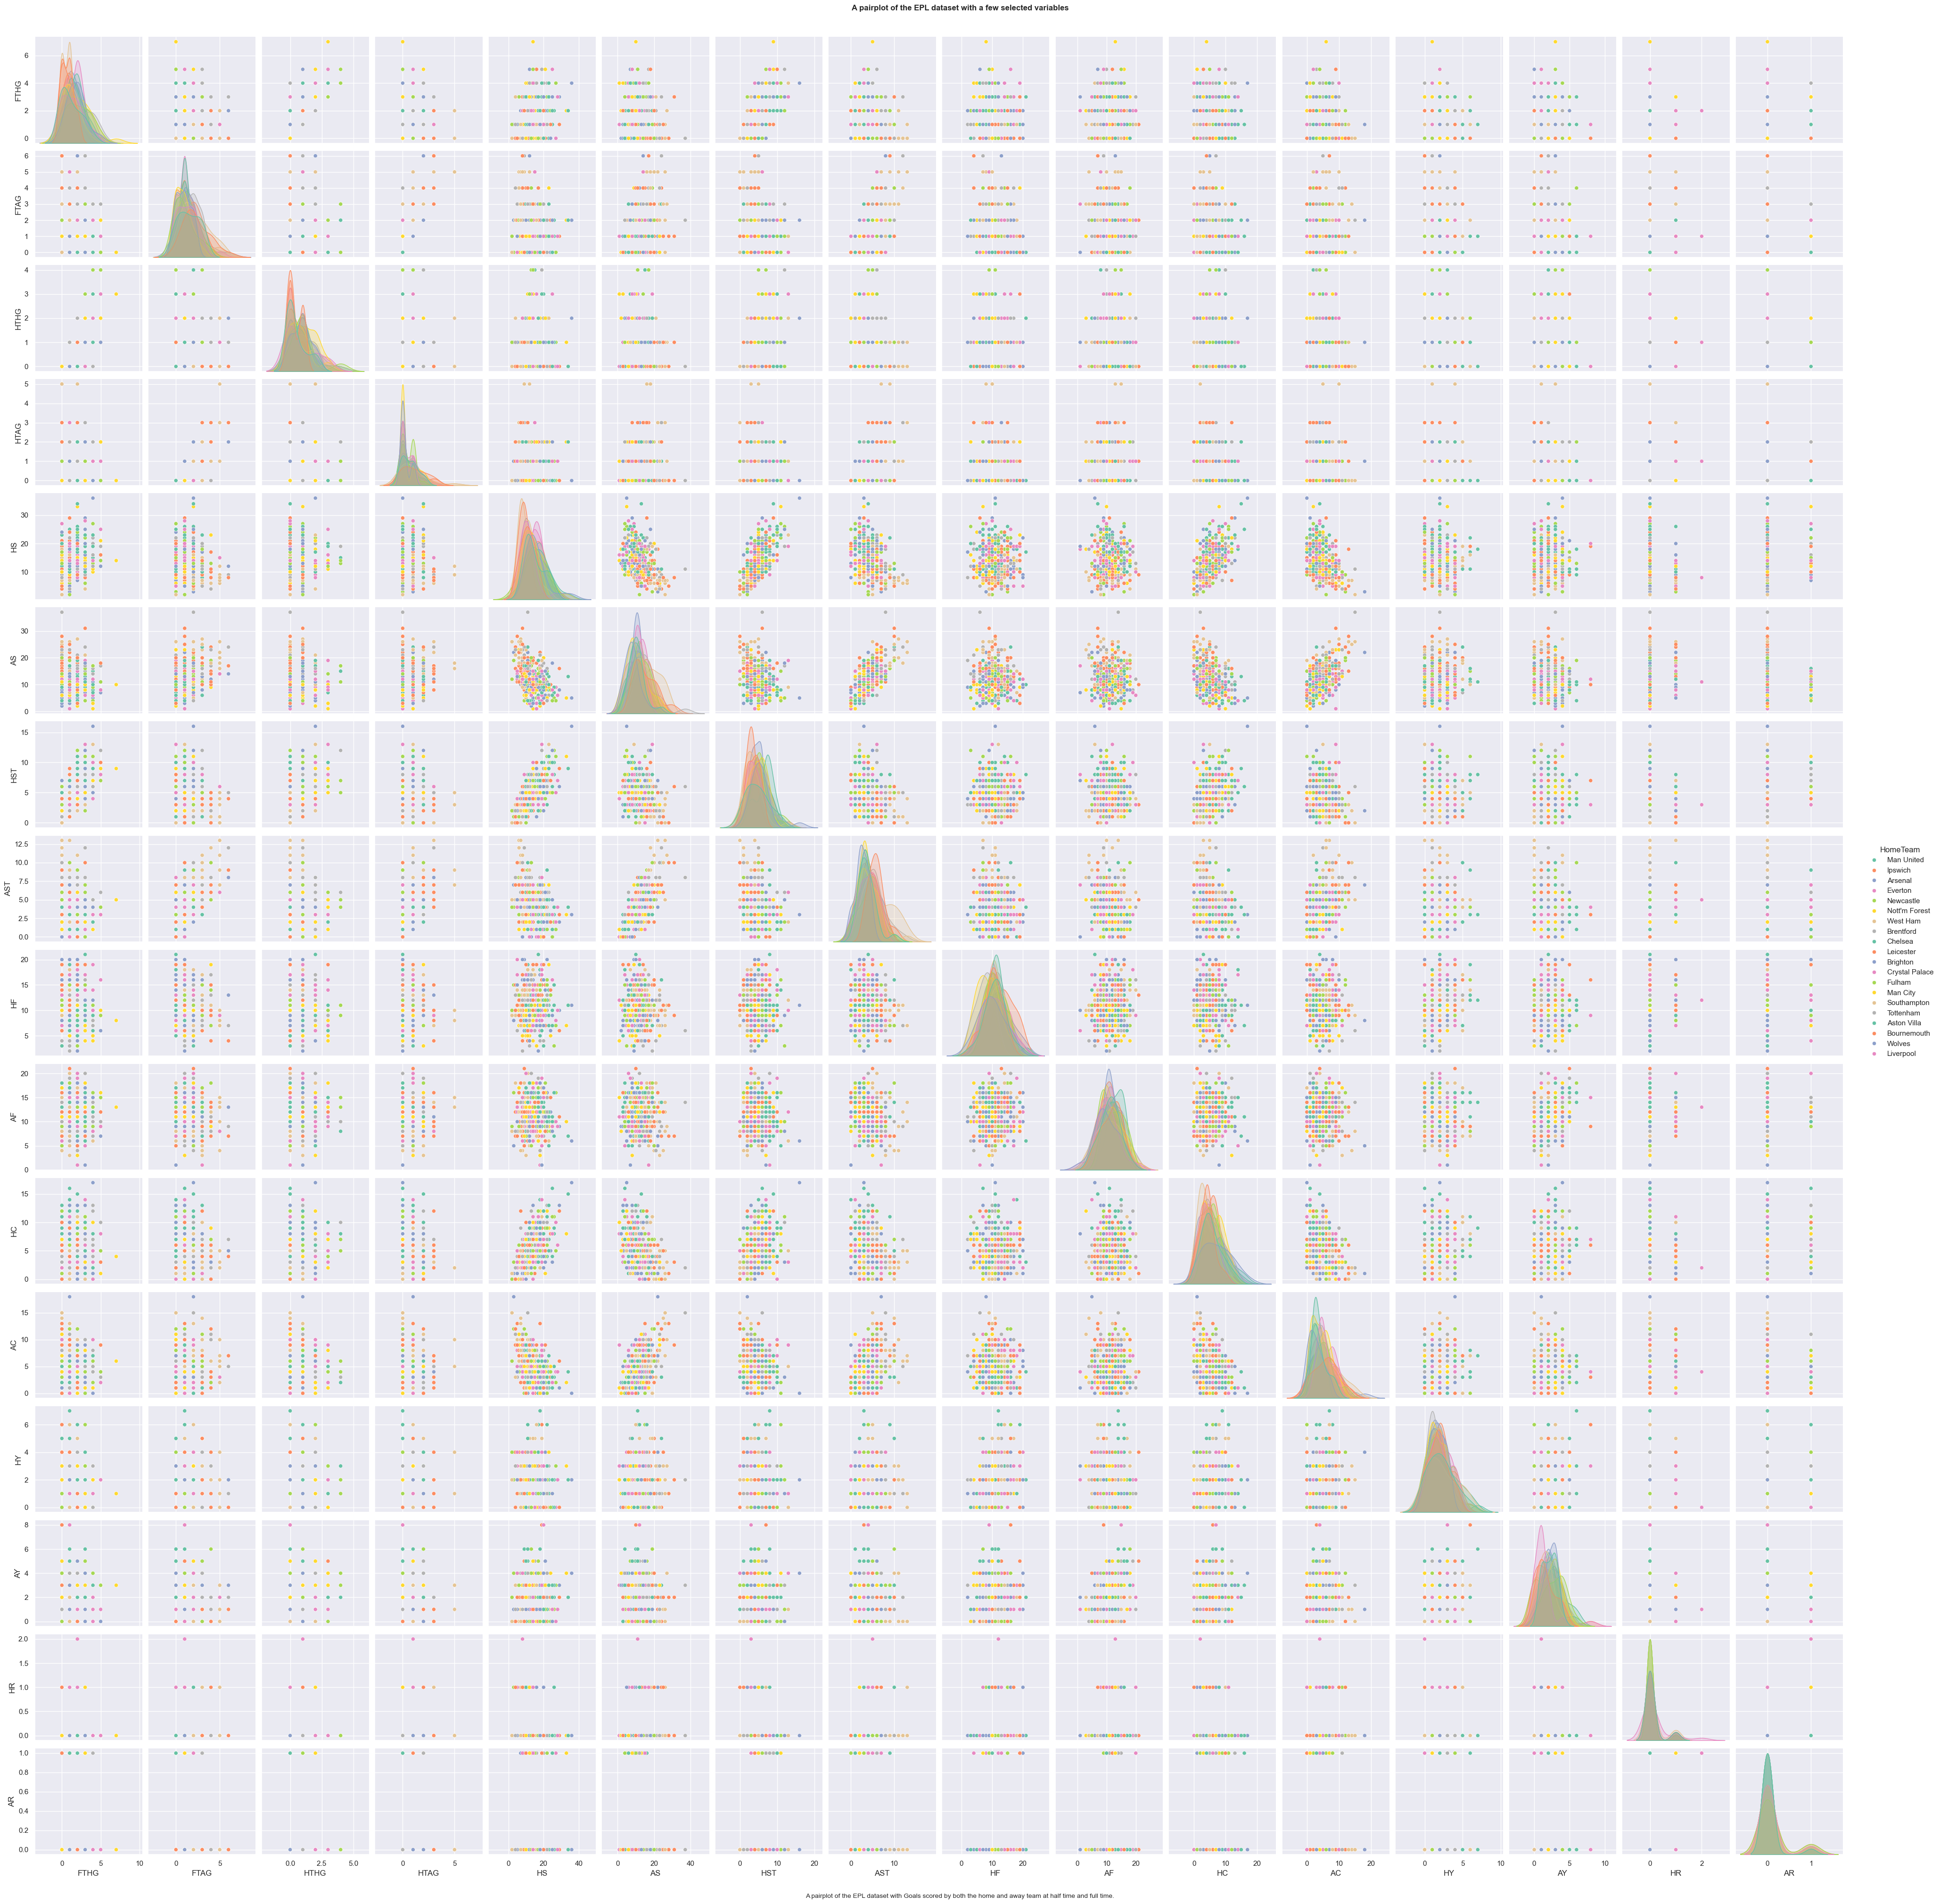

In [621]:
select_var=['HTHG', 'HTAG', 'FTHG', 'FTAG']

sb.pairplot(data=epl, hue='HomeTeam', palette='Set2', kind='scatter')
plt.suptitle('A pairplot of the EPL dataset with a few selected variables', x=0.5, y=1.005, fontsize=12, fontweight='bold')
# Add a footnote
plt.figtext(0.5, 0.001, 'A pairplot of the EPL dataset with Goals scored by both the home and away team at half time and full time.', ha='center', fontsize=10)
plt.savefig('EPL Pairplot.jpg', dpi=500)
plt.show()

<Figure size 2000x2000 with 0 Axes>

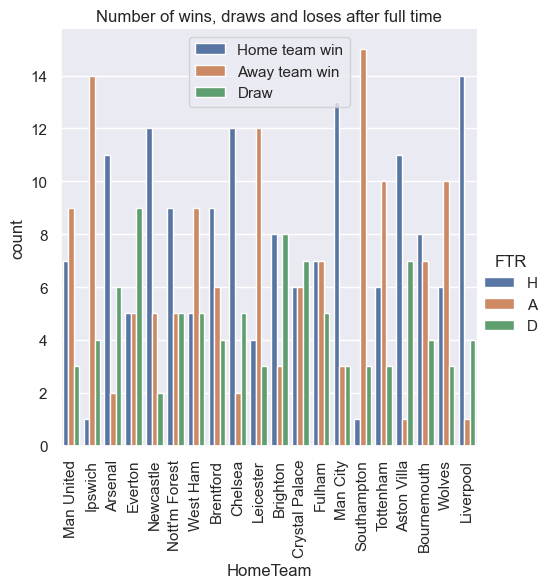

In [624]:
plt.figure(figsize=(20,20))
sb.catplot(data=epl, x='HomeTeam', hue='FTR', kind='count')
plt.xticks(rotation=90)
plt.legend(['Home team win', 'Away team win', 'Draw'], loc='upper center')
plt.title('Number of wins, draws and loses after full time')
plt.savefig('EPL home result', dpi=700)
plt.show()

<Figure size 2000x2000 with 0 Axes>

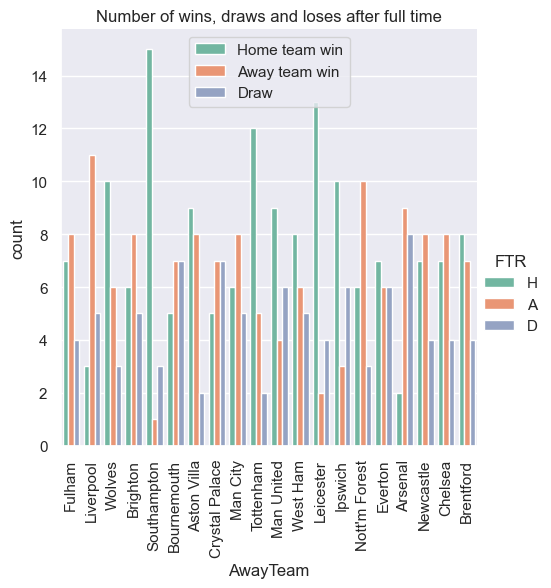

In [625]:
plt.figure(figsize=(20,20))
sb.catplot(data=epl, x='AwayTeam', hue='FTR', kind='count', palette='Set2')
plt.xticks(rotation=90)
plt.legend(['Home team win', 'Away team win', 'Draw'], loc='upper center')
plt.title('Number of wins, draws and loses after full time')
plt.savefig('EPL away result', dpi=700)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))

epl.boxplot(by='HTR', vert=False)
plt.xticks(rotation=90)

#plt.suptitle('A boxplot of the EPL dataset', fontweight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
epl.boxplot(by='FTR', vert=False)
plt.xticks(rotation=90)
plt.show()

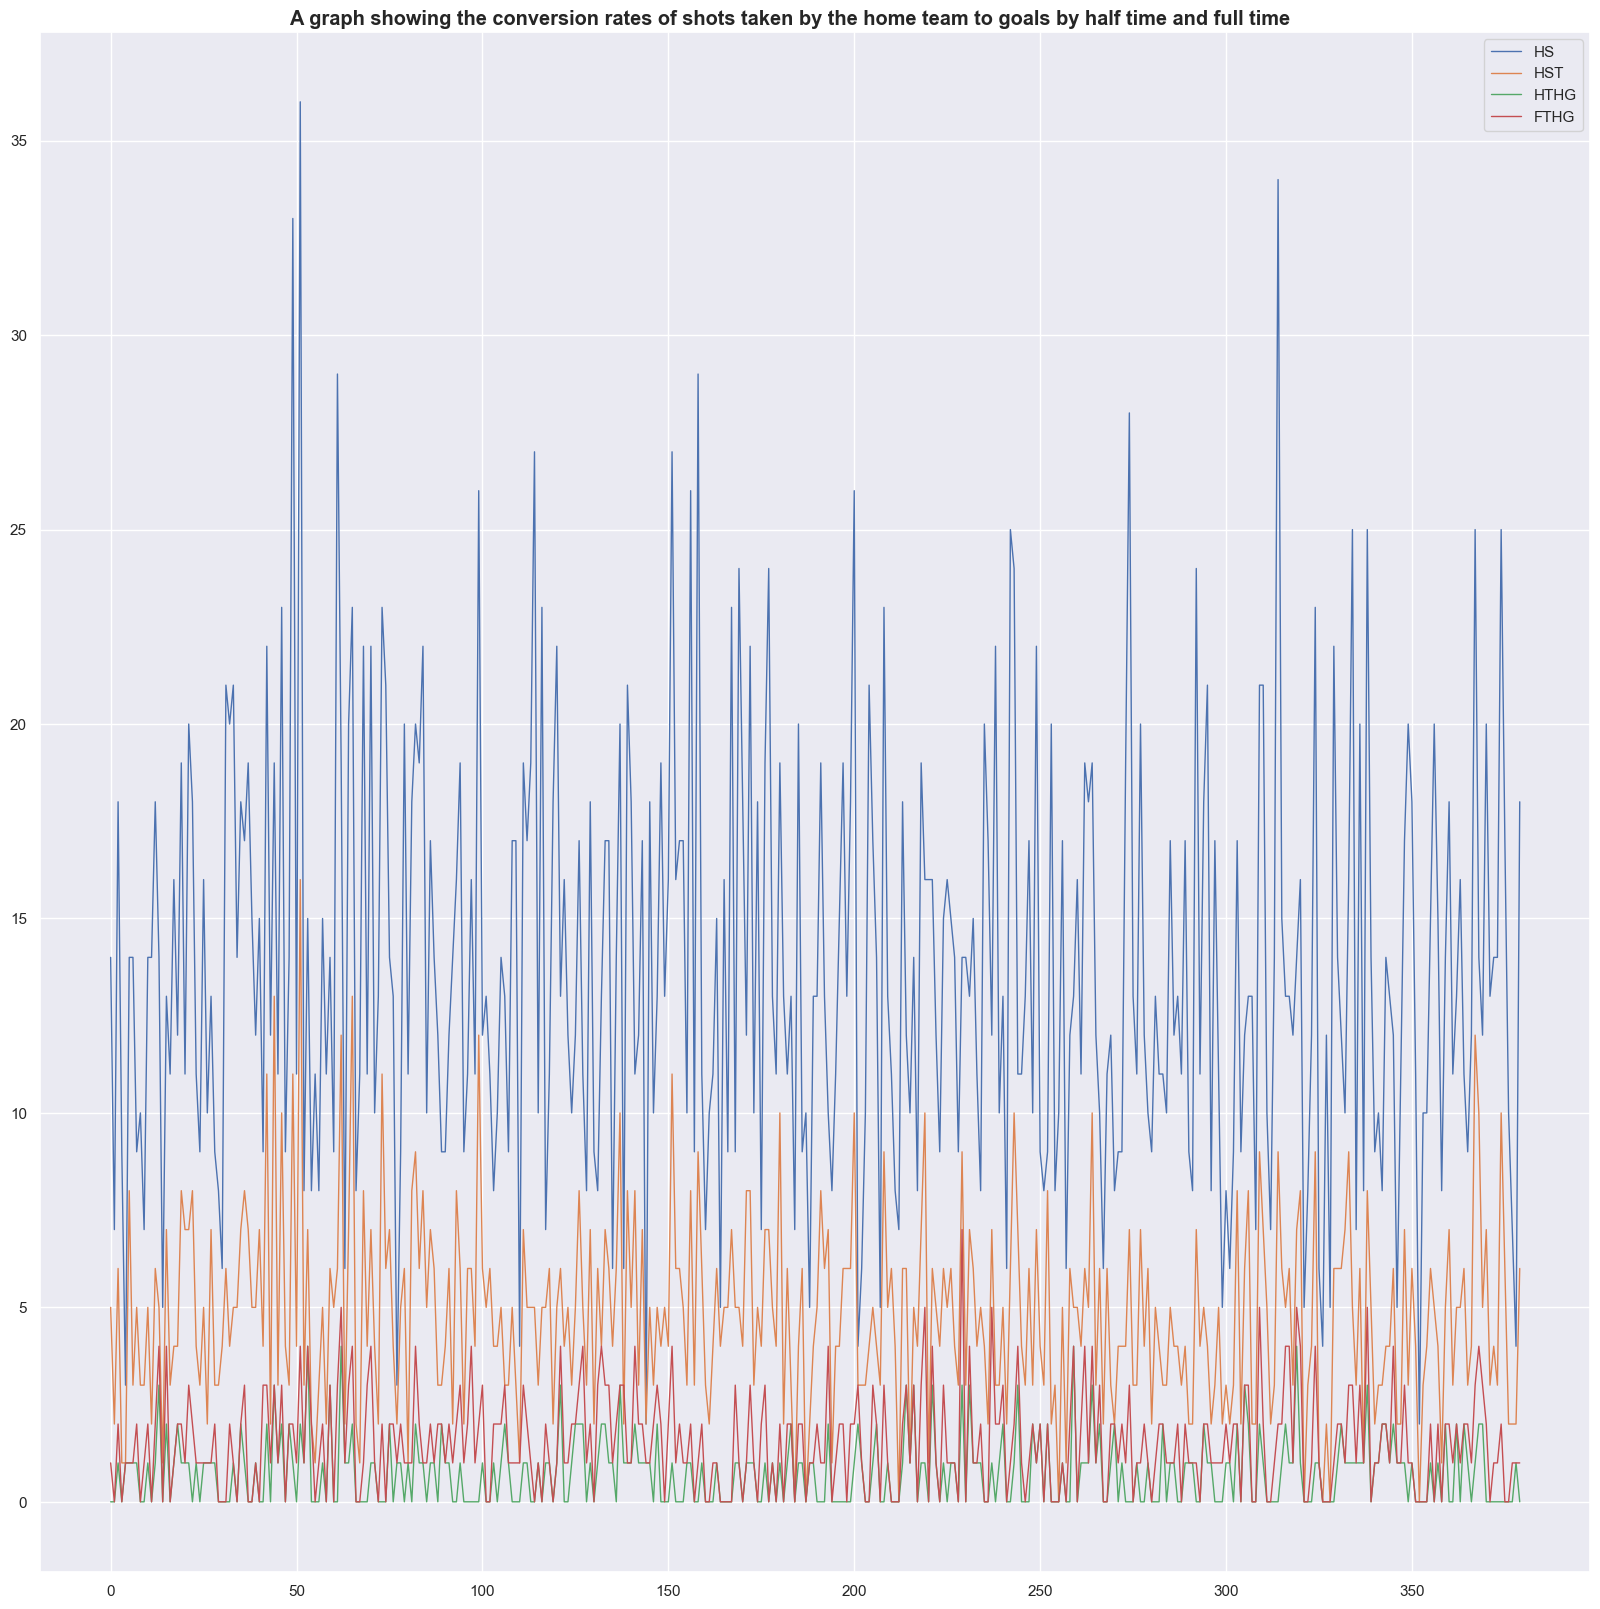

In [526]:
epl[['HS', 'HST', 'HTHG', 'FTHG']].plot(figsize=(20,20), linewidth=1, subplots=False)
plt.suptitle('A graph showing the conversion rates of shots taken by the home team to goals by half time and full time', y=0.891, fontweight='bold')
plt.show()

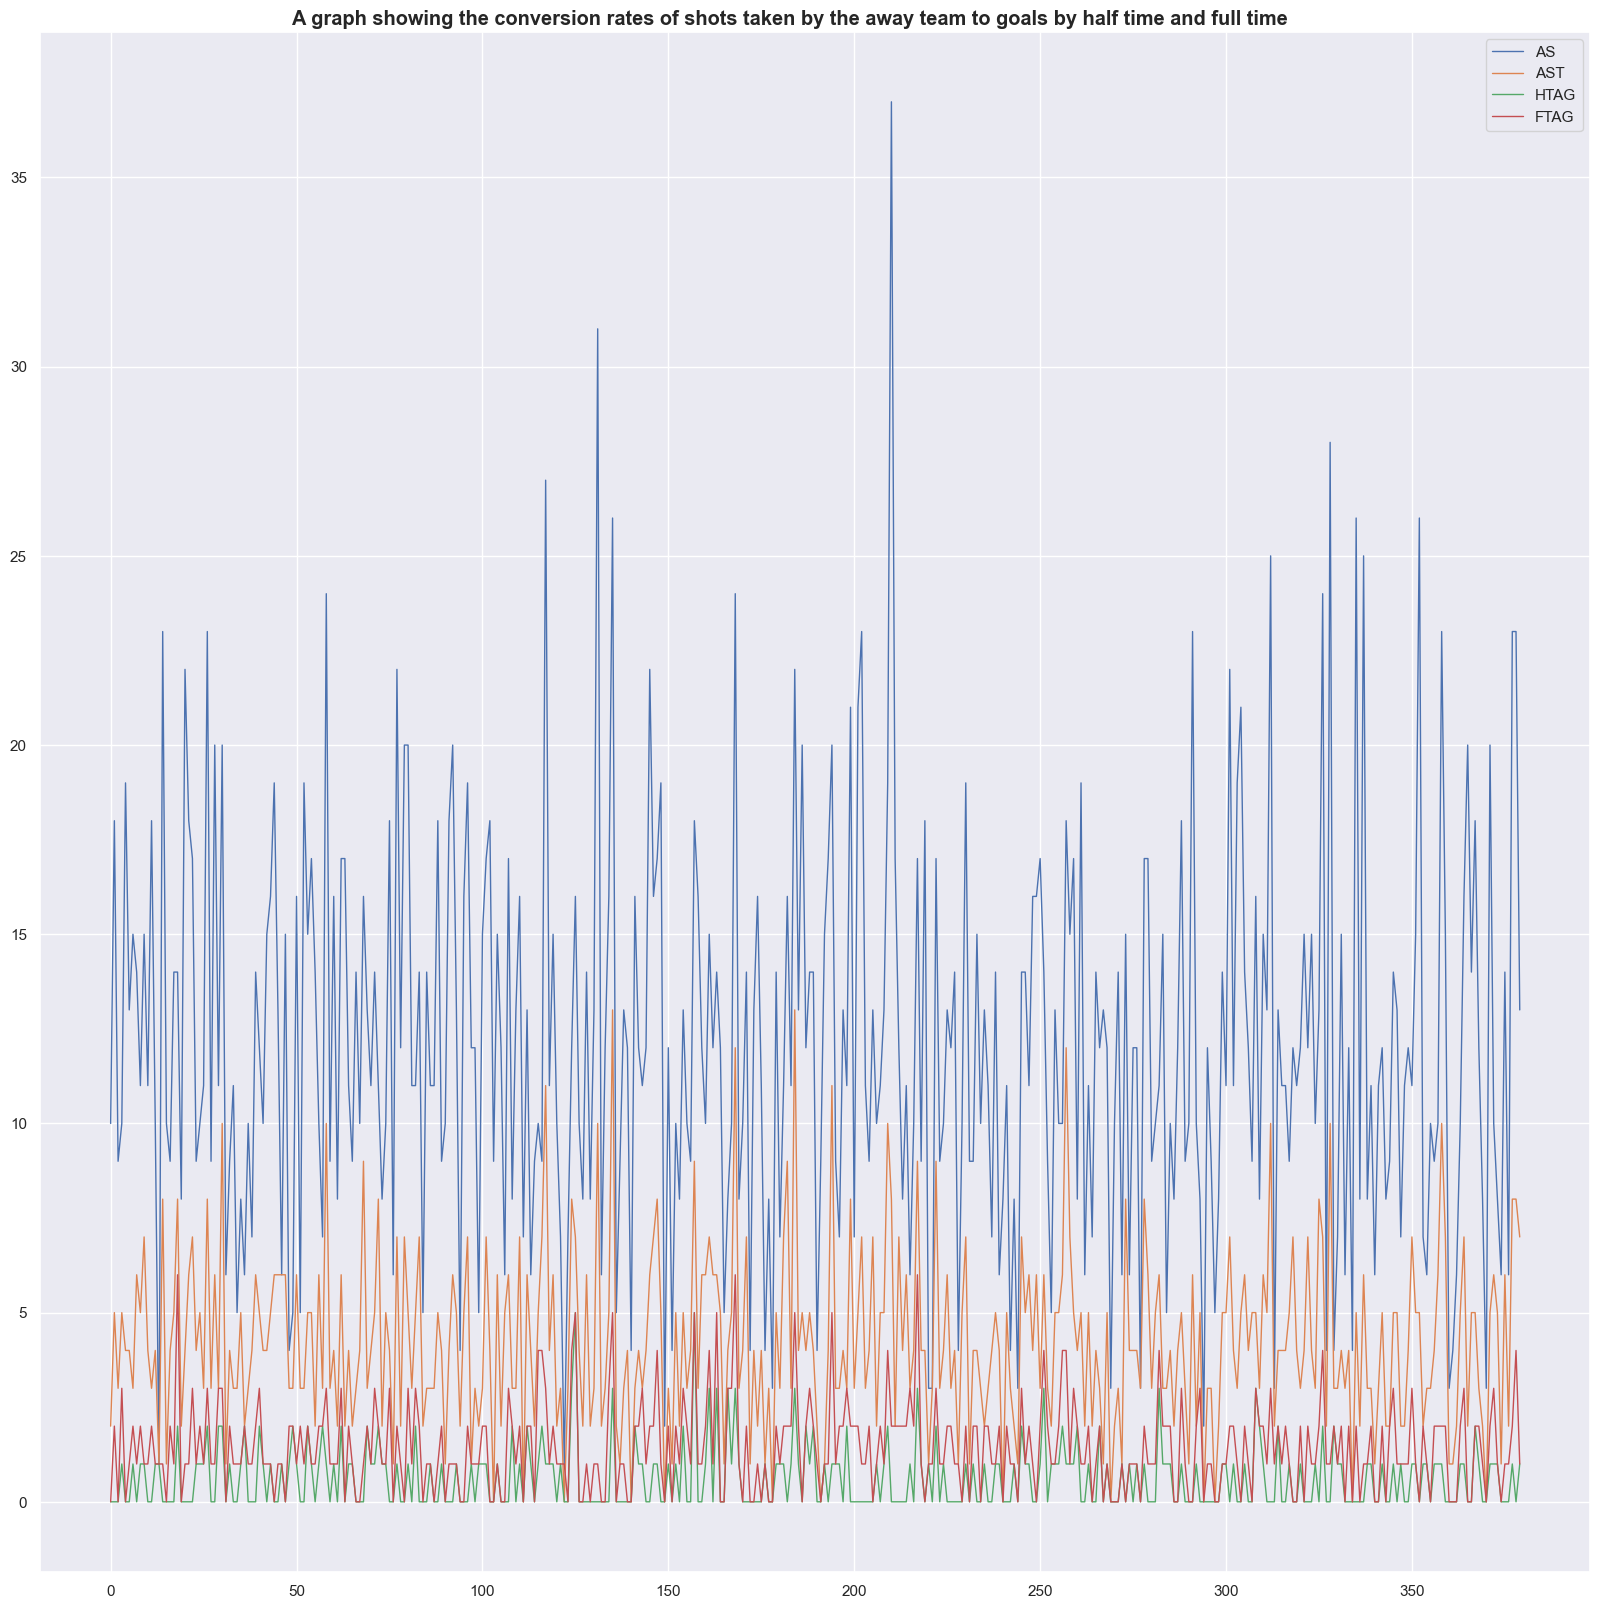

In [512]:
epl[['AS', 'AST', 'HTAG', 'FTAG']].plot(figsize=(20,20), linewidth=1, subplots=False)
plt.suptitle('A graph showing the conversion rates of shots taken by the away team to goals by half time and full time', y=0.891, fontweight='bold')

plt.show()

From the graphs above, we can see that home teams tend to have more shots taken and converted while poor for the away teams.
The hometeams managed to generally have better performances by half time having at least one goal scored by half tome and 

In [ ]:
plt.figure(figsize=(10,10))

home_col=['HS', 'HST', 'HTHG', 'FTHG']
away_col=['AS', 'AST', 'HTAG', 'FTAG']
home_sum=epl[home_col].sum()
away_sum=epl[away_col].sum()

HS_sum=epl['HS'].sum()
HST_sum=epl['HST'].sum()
HTHG_sum=epl['HTHG'].sum()
FTHG_sum=epl['FTHG'].sum()
HHT_conversion=HTHG_sum/HST_sum * 100
HFT_conversion=FTHG_sum/HST_sum * 100
HST_con=HST_sum/HS_sum * 100

print('The Home Team Half Total shots taken: {}.'.format(HS_sum))
print('The Home Team Half Time conversion rate is {}%. \nThe Home Team Full Time conversion rate is {}% \nThe Home Team Shot Accuracy rate is {}% \n'.format(HHT_conversion, HFT_conversion, HST_con))

AS_sum=epl['AS'].sum()
AST_sum=epl['AST'].sum()
HTAG_sum=epl['HTAG'].sum()
FTAG_sum=epl['FTAG'].sum()
AHT_conversion=HTAG_sum/AST_sum * 100
AFT_conversion=FTAG_sum/AST_sum * 100
AST_con=AST_sum/AS_sum * 100

print('The Away Team Total shots taken: {}.'.format(AS_sum))
print('The Away Team Half Time conversion rate is {}%. \nThe Away Team Full Time conversion rate is {}% \nThe Away Team Shot Accuracy rate is {}% \n'.format(AHT_conversion, AFT_conversion, AST_con))

plt.figtext(0.45, 0.18, 'Goal conversion pie chart', ha='left', fontsize=10)

plt.subplot(1, 2, 1)
plt.pie(home_sum, labels=home_sum.index, autopct="%1.4f%%")
plt.legend(['HS: Home_Team_Shots', 'HST: Home_Team_Shots_on_Target', 'HTHG: Half_Time_Home_Team_Goals', 'FTHG: Full_Time_Home_Team_Goals'], bbox_to_anchor=(1.05, -0.05), ncol=1)
plt.title('A combined pie chart of HS, HST, HTHG, FTHG', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(away_sum, labels=away_sum.index, autopct="%1.4f%%")
plt.legend(['AS: Away_Team_Shots', 'AST:  Away_Team_Shots_on_Target', 'HTAG: Half_Time_Away_Team_Goals', 'FTAG: Full_Time_Away_Team_Goals'], bbox_to_anchor=(1.05, -0.05), ncol=1)
plt.title('A combined pie chart of AS, AST, HTAG and FTAG', fontweight='bold')

plt.show()

- The number of shots taken by home teams was far much more than that taken by the away teams by 603. This might be attributed to the support form fans and home confidence.
- Out of the total shots taken, the shot accuracy for heams while at home is about 35.15% while for the away team stands at 35.06%, giving the home team a slight advantage.
- The half time conversion rate for the home teams is also higher than the away teams by a large margin, standing at 15.57% compared to 14.31%, showing that the home teams wereconfident having being backed at home by their supporters.
- The full time conversion rate for the away teams is also higher than the home teams by a large margin, standing at 33.31% compared to 31.3%. This can be attributed to the lower placed teams having conceded a lot of goals from the stronger teams.

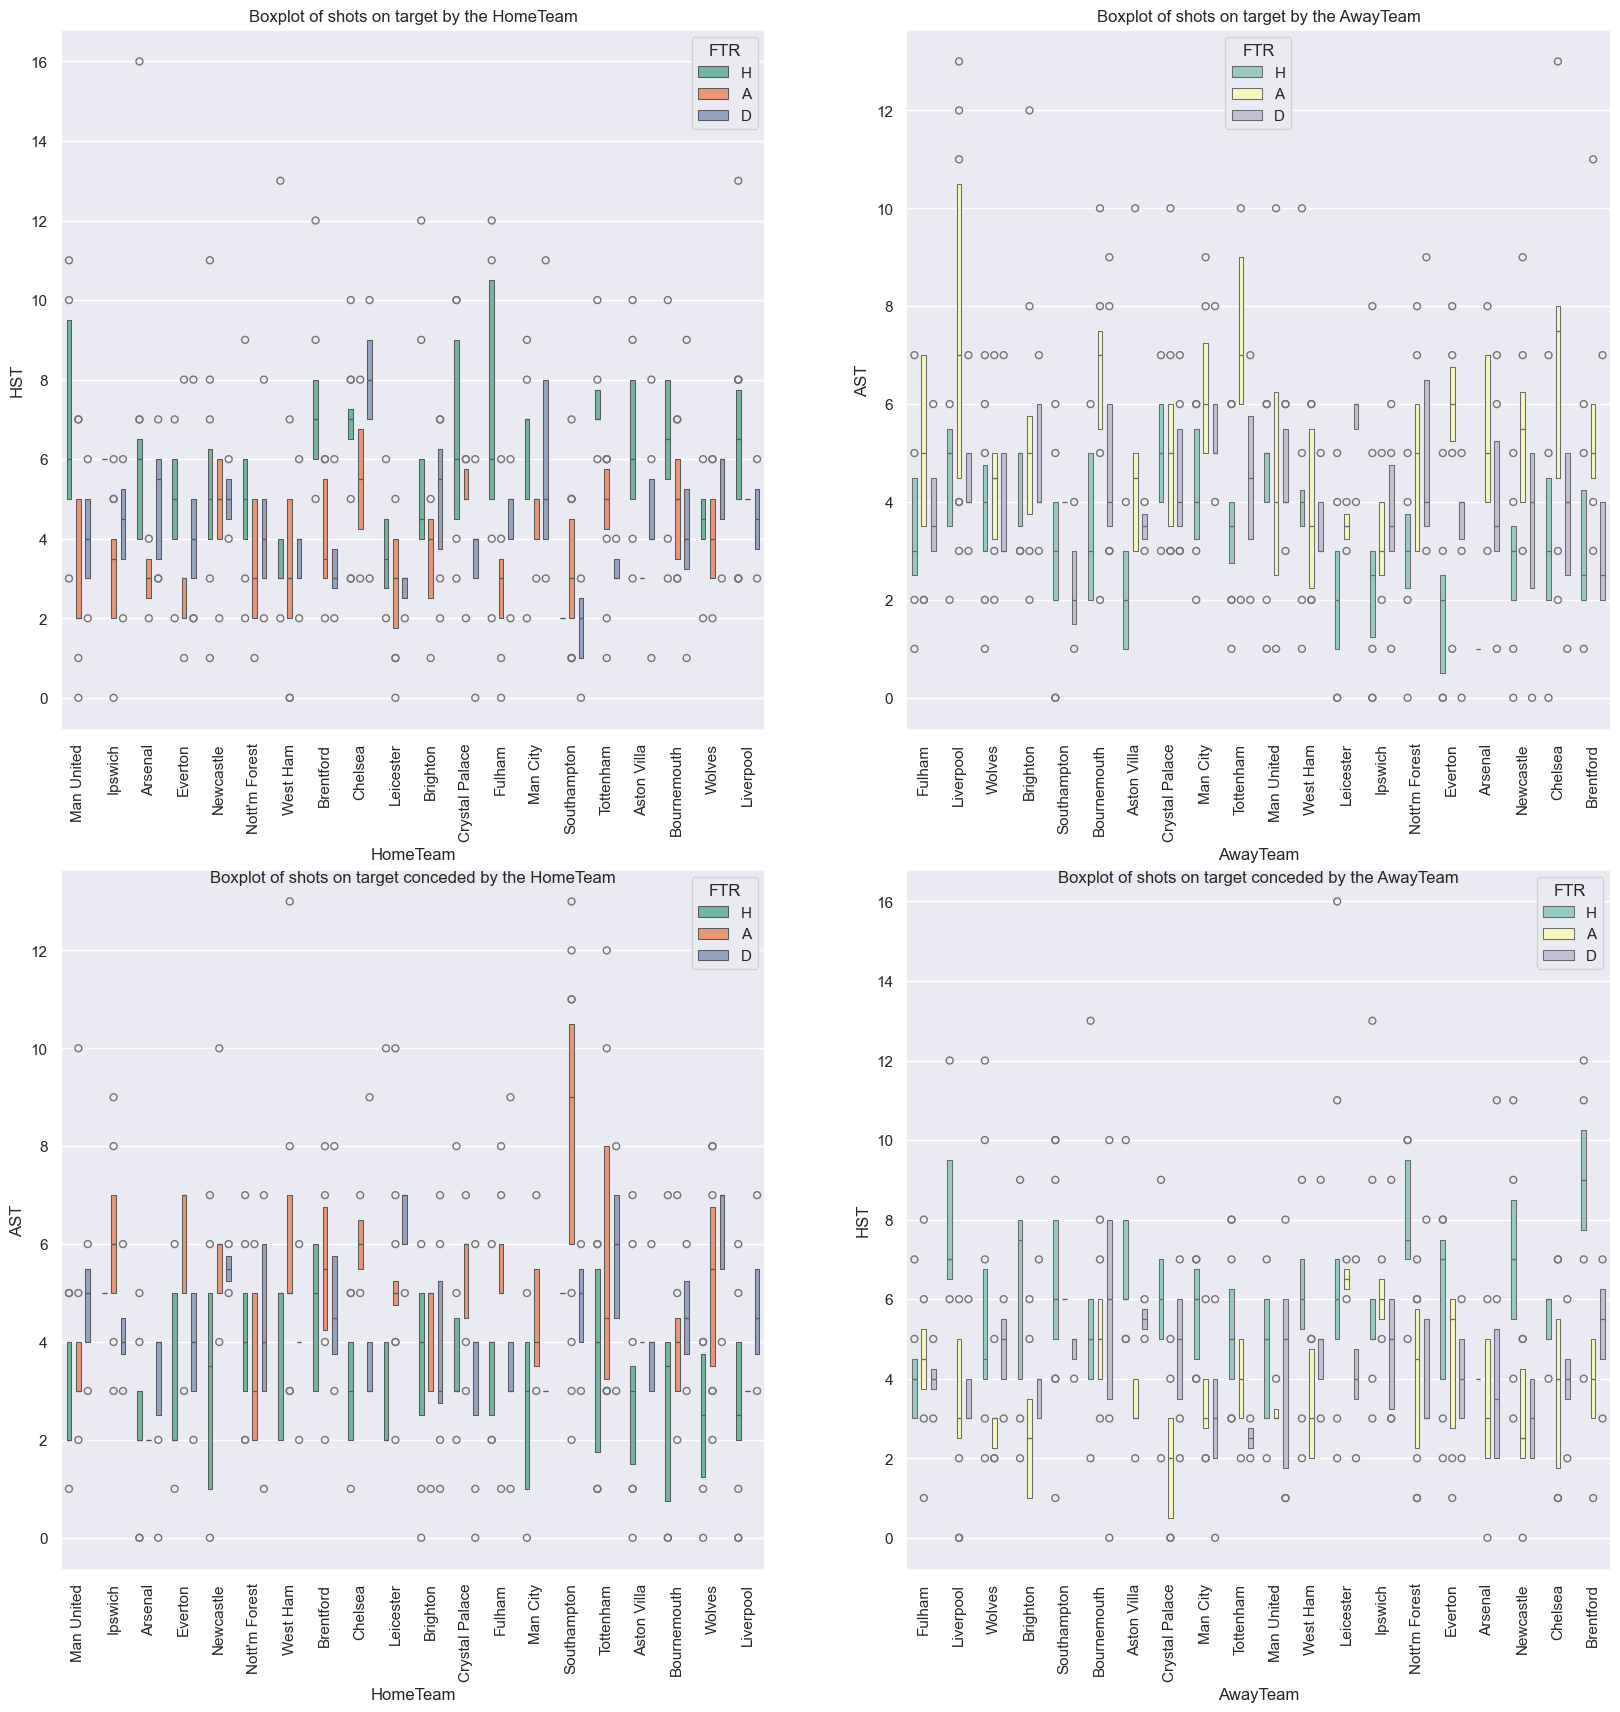

In [145]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
sb.boxenplot(data=epl, x='HomeTeam', y='HST', hue='FTR', palette='Set2', gap=0.5)
plt.xticks(rotation=90)
plt.title('Boxplot of shots on target by the HomeTeam')

plt.subplot(2, 2, 2)
sb.boxenplot(data=epl, x='AwayTeam', y='AST', hue='FTR', palette='Set3', gap=0.5)
plt.xticks(rotation=90)
plt.title('Boxplot of shots on target by the AwayTeam')

plt.subplot(2, 2, 4)
sb.boxenplot(data=epl, x='AwayTeam', y='HST', hue='FTR', palette='Set3', gap=0.5)
plt.xticks(rotation=90)
plt.title('Boxplot of shots on target conceded by the AwayTeam', y=0.97)

plt.subplot(2, 2, 3)
sb.boxenplot(data=epl, x='HomeTeam', y='AST', hue='FTR', palette='Set2', gap=0.5)
plt.xticks(rotation=90)
plt.title('Boxplot of shots on target conceded by the HomeTeam', y=0.97)

plt.show()

<Figure size 2000x2000 with 0 Axes>

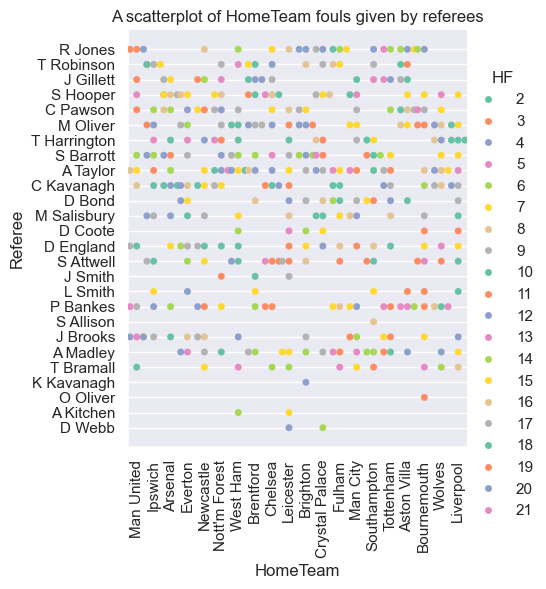

In [557]:
plt.figure(figsize=(20,20))

sub_1=sb.catplot(data=epl, x='HomeTeam', hue='HF', kind='swarm', y='Referee', palette='Set2')
sub_1.set_xticklabels(rotation=90)
plt.title('A scatterplot of HomeTeam fouls given by referees')

plt.show()

<Figure size 2000x2000 with 0 Axes>

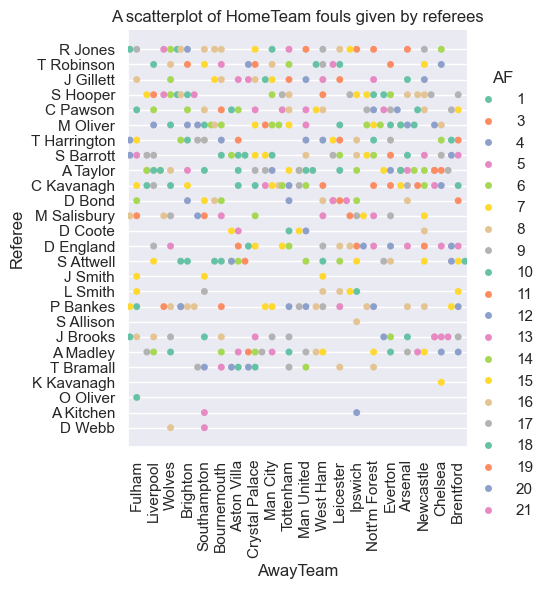

In [559]:
plt.figure(figsize=(20,20))

sub_1=sb.catplot(data=epl, x='AwayTeam', hue='AF', kind='swarm', y='Referee', palette='Set2')
sub_1.set_xticklabels(rotation=90)
plt.title('A scatterplot of HomeTeam fouls given by referees')

plt.show()

<Figure size 2000x2000 with 0 Axes>

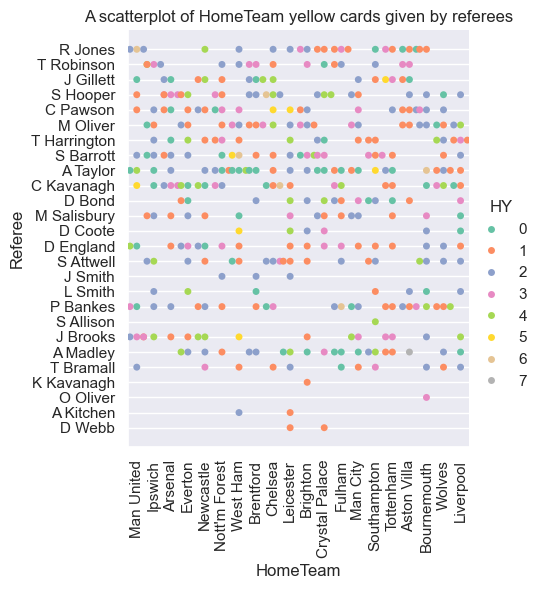

In [553]:
plt.figure(figsize=(20,20))

sub_2=sb.catplot(data=epl, x='HomeTeam', hue='HY', kind='swarm', y='Referee', palette='Set2')
sub_2.set_xticklabels(rotation=90)
plt.title('A scatterplot of HomeTeam yellow cards given by referees')

plt.show()

<Figure size 2000x2000 with 0 Axes>

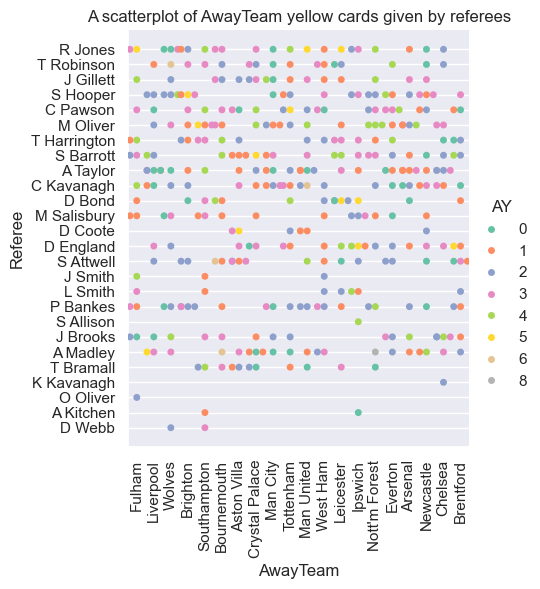

In [555]:
plt.figure(figsize=(20,20))

sub_2=sb.catplot(data=epl, x='AwayTeam', hue='AY', kind='swarm', y='Referee', palette='Set2')
sub_2.set_xticklabels(rotation=90)
plt.title('A scatterplot of AwayTeam yellow cards given by referees')

plt.show()

<Figure size 2000x2000 with 0 Axes>

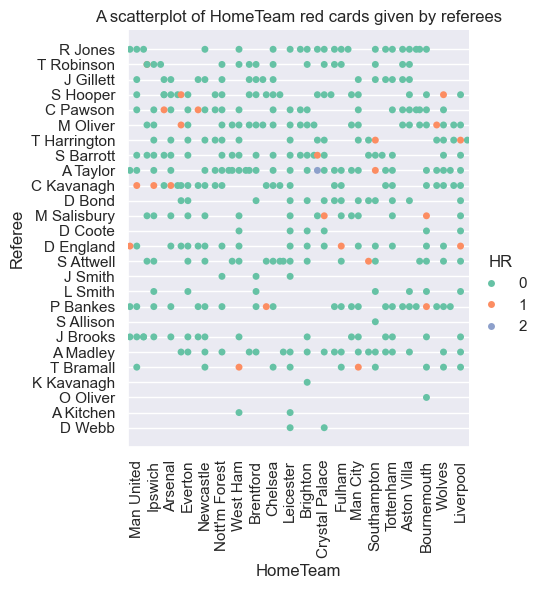

In [564]:
plt.figure(figsize=(20,20))

sub_1=sb.catplot(data=epl, x='HomeTeam', hue='HR', kind='swarm', y='Referee', palette='Set2')
sub_1.set_xticklabels(rotation=90)
plt.title('A scatterplot of HomeTeam red cards given by referees')

plt.show()

<Figure size 2000x2000 with 0 Axes>

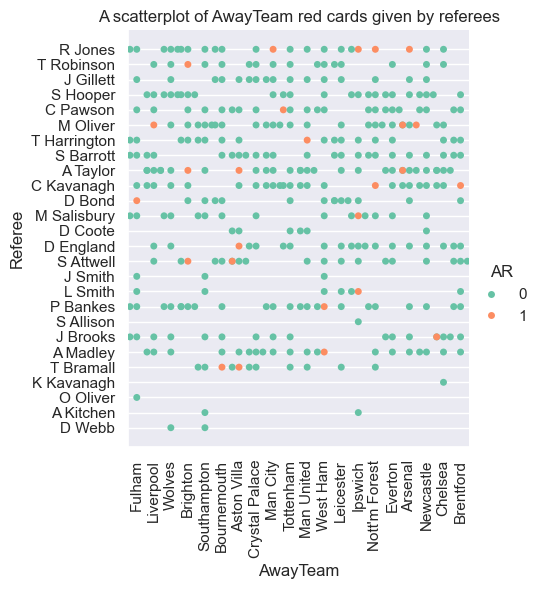

In [563]:
plt.figure(figsize=(20,20))

sub_1=sb.catplot(data=epl, x='AwayTeam', hue='AR', kind='swarm', y='Referee', palette='Set2')
sub_1.set_xticklabels(rotation=90)
plt.title('A scatterplot of AwayTeam red cards given by referees')

plt.show()

### Machine Learning using Random Forest Classifier

In [580]:
from sklearn.preprocessing import *  # LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *  # accuracy_score, classification_report

In [581]:
label=LabelEncoder()
scaler=MinMaxScaler()
standard=StandardScaler()
onehot=OneHotEncoder(sparse_output=False)
random=RandomForestClassifier(n_estimators=100, random_state=42)

In [582]:
epl.head()

Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  16/08/2024  20:00  Man United       Fulham     1     0   H     0     0   
1  E0  17/08/2024  12:30     Ipswich    Liverpool     0     2   A     0     0   
2  E0  17/08/2024  15:00     Arsenal       Wolves     2     0   H     1     0   
3  E0  17/08/2024  15:00     Everton     Brighton     0     3   A     0     1   
4  E0  17/08/2024  15:00   Newcastle  Southampton     1     0   H     1     0   

   ... HST AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  ...   5   2  12  10   7   8   2   3   0   0  
1  ...   2   5   9  18   2  10   3   1   0   0  
2  ...   6   3  17  14   8   2   2   2   0   0  
3  ...   1   5   8   8   1   5   1   1   1   0  
4  ...   1   4  15  16   3  12   2   4   1   0  

[5 rows x 24 columns]

In [583]:
epl_=epl.rename(columns={'FTHG':'Full_Time_Home_Team_Goals', 'FTAG':'Full_Time_Away_Team_Goals', 'FTR':'Full_Time_Result', 'HTHG':'Half_Time_Home_Team_Goals', 
                         'HTAG':'Half_Time_Away_Team_Goals', 'HTR':'Half_Time_Result', 'HS':'Home_Team_Shots', 'AS':'Away_Team_Shots', 'HST':'Home_Team_Shots_on_Target', 
                         'AST':'Away_Team_Shots_on_Target', 'HF':'Home_Team_Fouls_Committed', 'AF':'Away_Team_Fouls_Committed', 'HC':'Home_Team_Corners', 
                         'AC':'Away_Team_Corners', 'HY':'Home_Team_Yellow_Cards', 'AY':'Away_Team_Yellow_Cards', 'HR':'Home_Team_Red_Cards', 'AR':'Away_Team_Red_Cards'})

In [584]:
epl_.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
       'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals',
       'Full_Time_Result', 'Half_Time_Home_Team_Goals',
       'Half_Time_Away_Team_Goals', 'Half_Time_Result', 'Referee',
       'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Shots_on_Target',
       'Away_Team_Shots_on_Target', 'Home_Team_Fouls_Committed',
       'Away_Team_Fouls_Committed', 'Home_Team_Corners', 'Away_Team_Corners',
       'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards',
       'Home_Team_Red_Cards', 'Away_Team_Red_Cards'],
      dtype='object')

In [585]:
epl_.sample(2).style.background_gradient(cmap='Blues')

In [586]:
epl_['Referee']=label.fit_transform(epl_['Referee'])
epl_['HomeTeam']=label.fit_transform(epl_['HomeTeam'])
epl_['AwayTeam']=label.fit_transform(epl_['AwayTeam'])
epl_['Full_Time_Home_Team_Goals']=scaler.fit_transform(epl_[['Full_Time_Home_Team_Goals']])
epl_['Full_Time_Away_Team_Goals']=scaler.fit_transform(epl_[['Full_Time_Away_Team_Goals']])
epl_['Full_Time_Result']=onehot.fit_transform(epl_[['Full_Time_Result']])
epl_['Half_Time_Home_Team_Goals']=scaler.fit_transform(epl_[['Half_Time_Home_Team_Goals']])
epl_['Half_Time_Away_Team_Goals']=scaler.fit_transform(epl_[['Half_Time_Away_Team_Goals']])
epl_['Half_Time_Result']=onehot.fit_transform(epl_[['Half_Time_Result']])
epl_['Home_Team_Shots']=scaler.fit_transform(epl_[['Home_Team_Shots']])
epl_['Away_Team_Shots']=scaler.fit_transform(epl_[['Away_Team_Shots']])
epl_['Home_Team_Shots_on_Target']=scaler.fit_transform(epl_[['Home_Team_Shots_on_Target']])
epl_['Away_Team_Shots_on_Target']=scaler.fit_transform(epl_[['Away_Team_Shots_on_Target']])
epl_['Home_Team_Fouls_Committed']=scaler.fit_transform(epl_[['Home_Team_Fouls_Committed']])
epl_['Away_Team_Fouls_Committed']=scaler.fit_transform(epl_[['Away_Team_Fouls_Committed']])
epl_['Home_Team_Corners']=scaler.fit_transform(epl_[['Home_Team_Corners']])
epl_['Away_Team_Corners']=scaler.fit_transform(epl_[['Away_Team_Corners']])
epl_['Home_Team_Yellow_Cards']=scaler.fit_transform(epl_[['Home_Team_Yellow_Cards']])
epl_['Away_Team_Yellow_Cards']=scaler.fit_transform(epl_[['Away_Team_Yellow_Cards']])
epl_['Home_Team_Red_Cards']=scaler.fit_transform(epl_[['Home_Team_Red_Cards']])
epl_['Away_Team_Red_Cards']=scaler.fit_transform(epl_[['Away_Team_Red_Cards']])

In [587]:
epl_.head().style.background_gradient(cmap='Blues')

In [588]:
train=epl_.drop(['Div', 'Date', 'Time', 'Full_Time_Result'], axis=1)
train.columns

Index(['HomeTeam', 'AwayTeam', 'Full_Time_Home_Team_Goals',
       'Full_Time_Away_Team_Goals', 'Half_Time_Home_Team_Goals',
       'Half_Time_Away_Team_Goals', 'Half_Time_Result', 'Referee',
       'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Shots_on_Target',
       'Away_Team_Shots_on_Target', 'Home_Team_Fouls_Committed',
       'Away_Team_Fouls_Committed', 'Home_Team_Corners', 'Away_Team_Corners',
       'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards',
       'Home_Team_Red_Cards', 'Away_Team_Red_Cards'],
      dtype='object')

In [589]:
train.head().style.background_gradient(cmap='Blues')

In [592]:
test=epl_['Full_Time_Result']
test.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Full_Time_Result, dtype: float64

In [597]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, train_size=0.8, random_state=42)

In [601]:
random.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [604]:
# X_test prediction
x_test_pred=random.predict(X_test)
x_test_pred

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0.])

In [606]:
# Finding the accuracy, precision,recalla dn f1 scores of the RandomForestClassifier
print('Accuracy: {0} \nPrecision: {1} \nRecall: {2} \nF1-Score: {3}'.format(accuracy_score(Y_test, x_test_pred), precision_score(Y_test, x_test_pred), 
                                                                            recall_score(Y_test, x_test_pred), f1_score(Y_test, x_test_pred)))

Accuracy: 0.9868421052631579 
Precision: 1.0 
Recall: 0.9642857142857143 
F1-Score: 0.9818181818181818


In [608]:
print(classification_report(Y_test, x_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.96      0.98        28

    accuracy                           0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76



[[48  0]
 [ 1 27]]


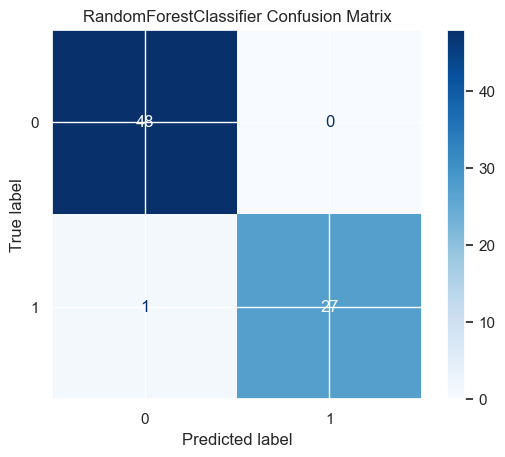

In [612]:
# Creating the confusion matrix for the RandomForestClassifier
con_mat=confusion_matrix(Y_test, x_test_pred)
print(con_mat)
# Creating the confusion matrix visual display
vis_con_mat=ConfusionMatrixDisplay(confusion_matrix=con_mat)
vis_con_mat.plot(cmap='Blues')
plt.title('RandomForestClassifier Confusion Matrix')
# Saving the figure
plt.savefig('RandomForestClassifier Confusion Matrix.jpg', dpi=500)
plt.show()

In [613]:
col_train=list(train.columns)
test_names=list(epl['FTR'].unique())
print('col_train: {0} \n\ntest_names: {1}'.format(col_train, test_names))

col_train: ['HomeTeam', 'AwayTeam', 'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals', 'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals', 'Half_Time_Result', 'Referee', 'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target', 'Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed', 'Home_Team_Corners', 'Away_Team_Corners', 'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards', 'Home_Team_Red_Cards', 'Away_Team_Red_Cards'] 

test_names: ['H', 'A', 'D']


In [614]:
# Renaming the test_names to Home_Win, Away_Win and Draw
test_names_=['Home_Win' if i == 'H' else
             'Away_Win' if i == 'A' else
             'Draw' for i in test_names]
test_names_

['Home_Win', 'Away_Win', 'Draw']

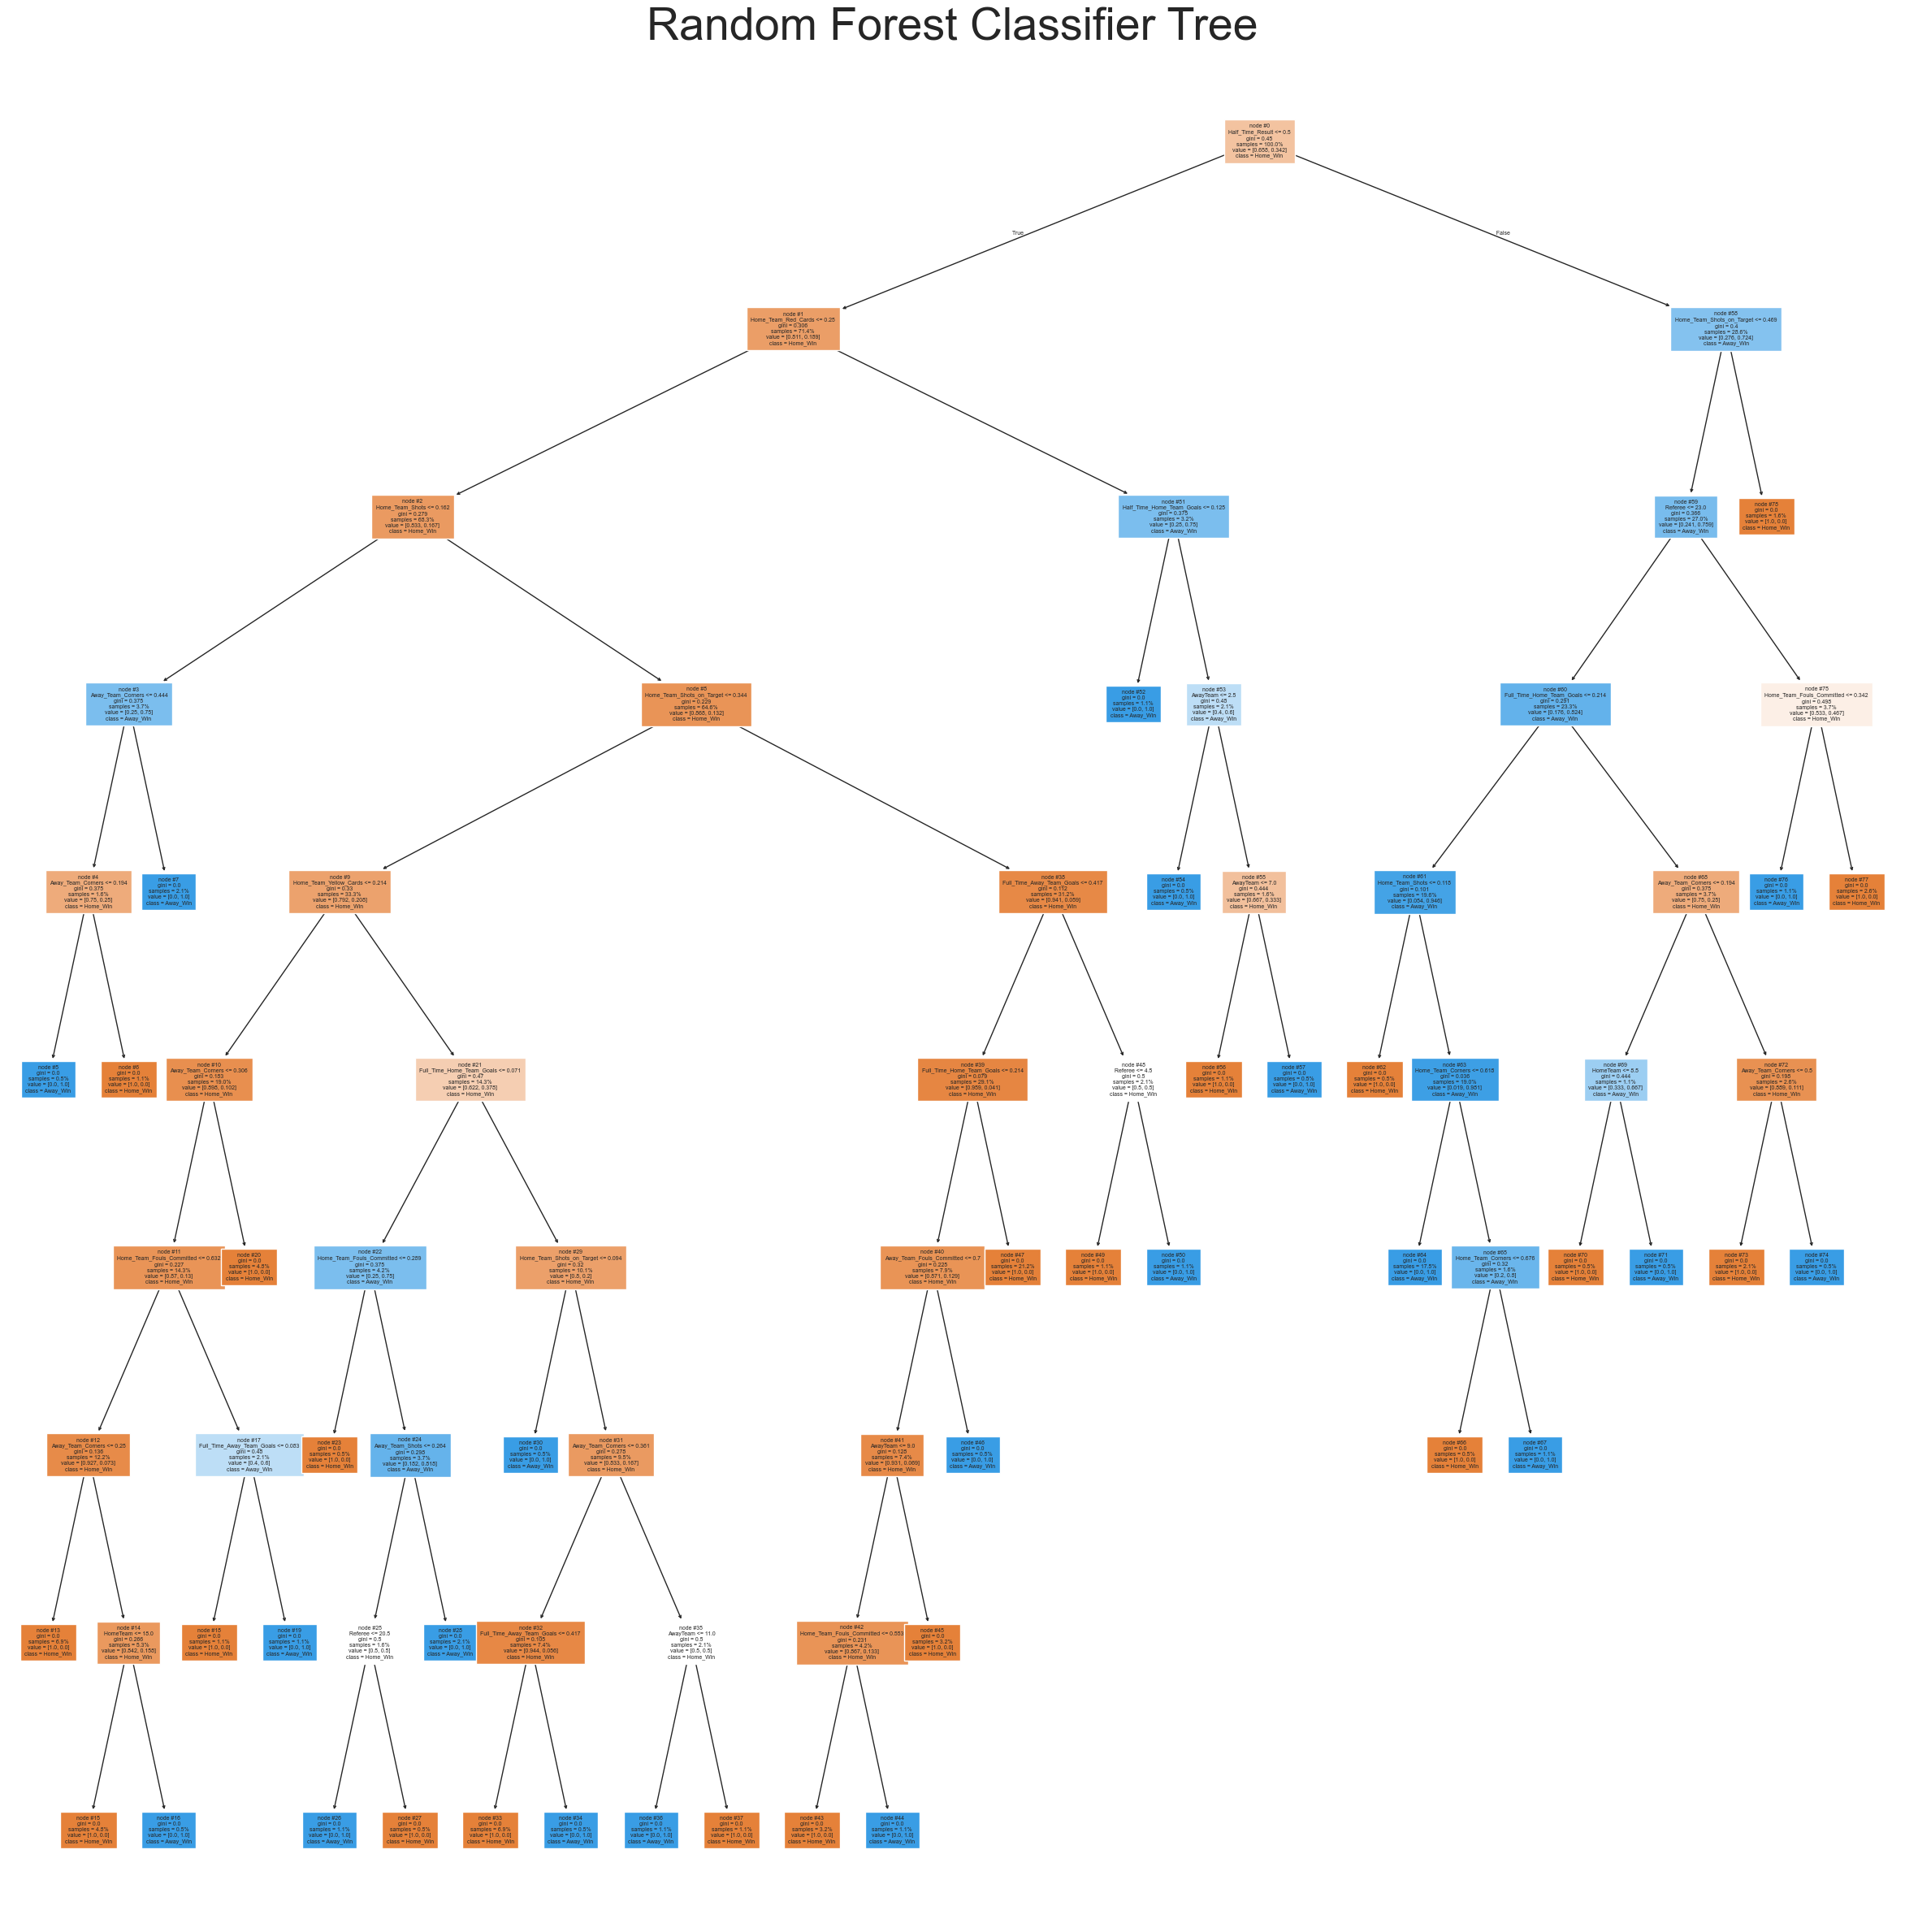

In [618]:
# Importing plot_tree 
from sklearn.tree import plot_tree

# Plotting the Random Forest Classifier tree 
plt.figure(figsize=(30,30))
plot_tree(random.estimators_[0], feature_names=col_train, class_names=test_names_, filled=True, fontsize=5, node_ids=True, proportion=True)
plt.title('Random Forest Classifier Tree', fontsize=40)
# Saving the image
plt.savefig('Random Forest Classifier Tree.jpg', dpi=700)

plt.show()